## Test Clustering with PyCaret

I would like to understand how clustering works with PyCaret.

In [1]:
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn plotting 
import seaborn as sns

In [2]:
data = pd.read_csv("../kaggle-data-sets/ai4i2020_prepared.csv")
data.head(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,temp_diff,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,6951.590560,10.5,0,0,1
1,298.2,308.7,1408,46.3,3,0,6826.722724,10.5,0,1,0
2,298.1,308.5,1498,49.4,5,0,7749.387543,10.4,0,1,0
3,298.2,308.6,1433,39.5,7,0,5927.504659,10.4,0,1,0


In [ ]:
from pycaret.classification import *

In [3]:
data = data.drop(['Machine failure'], axis = 1)

In [4]:
data.head(4)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,temp_diff,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,6951.590560,10.5,0,0,1
1,298.2,308.7,1408,46.3,3,6826.722724,10.5,0,1,0
2,298.1,308.5,1498,49.4,5,7749.387543,10.4,0,1,0
3,298.2,308.6,1433,39.5,7,5927.504659,10.4,0,1,0


In [5]:

from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,680
1,Original data shape,"(10000, 10)"
2,Transformed data shape,"(10000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [6]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(data, normalize = True)

,Description,Value
0,Session id,3151
1,Original data shape,"(10000, 10)"
2,Transformed data shape,"(10000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [7]:

# functional API
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2420,2310.4029,1.4433,0,0,0


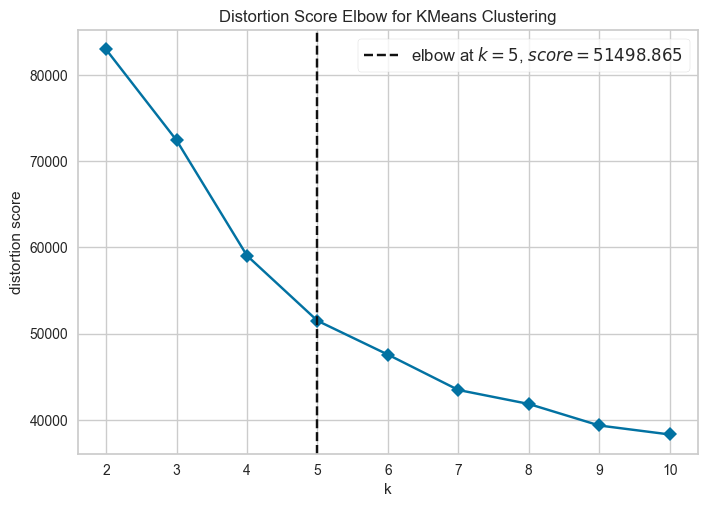

In [8]:

# functional API
plot_model(kmeans, plot = 'elbow')

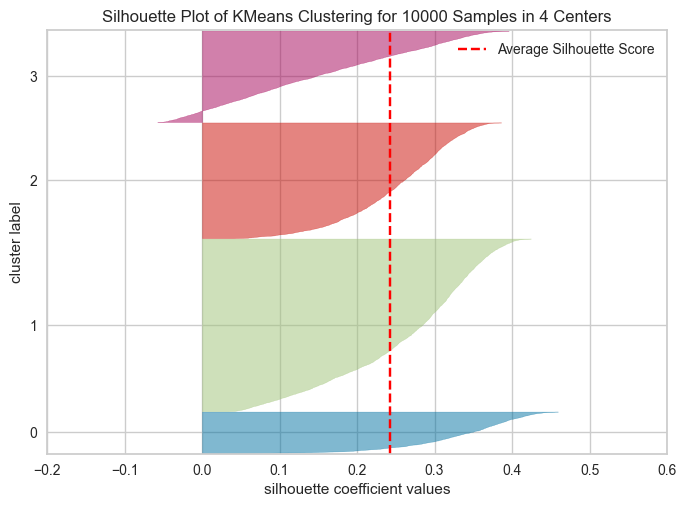

In [9]:

# functional API
plot_model(kmeans, plot = 'silhouette')

In [10]:
predictions = predict_model(kmeans, data = data)
predictions.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,temp_diff,Type_H,Type_L,Type_M,Cluster
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.629443,0.498849,-0.333889,-1.224745,1.528617,Cluster 2
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.512456,0.498849,-0.333889,0.816497,-0.654186,Cluster 1
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,1.376889,0.398954,-0.333889,0.816497,-0.654186,Cluster 1
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.330009,0.398954,-0.333889,0.816497,-0.654186,Cluster 1
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.357824,0.498849,-0.333889,0.816497,-0.654186,Cluster 1


In [ ]:
data = pd.read_csv("../kaggle-data-sets/ai4i2020_prepared.csv")